In [204]:
import pandas as pd
pd.set_option('display.max_rows', None)
from pandas import read_excel
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import math
import matplotlib.pyplot as plt
import os
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from pca import pca
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import xgboost
from xgboost import XGBClassifier
from pandas import MultiIndex
from pandas import Int64Index
import seaborn as sns
import matplotlib.pyplot as plt

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


# Read data from file

In [2]:
data = pd.read_excel('../data/dataset_final.xlsx', sheet_name = 'Dataset_Complete_modified')

In [3]:
data

,Polymer Index,type_A,type_B1,type_B2,type_C,composition_A,composition_B1,composition_B2,composition_C,block_sequence_theoretical,...,A2,B2,C2,A3,B3,C3,A4,B4,C4,cLogP_predicted
0,1,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,0.20,ABC,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.67630
1,2,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,0.20,ABC,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.67630
2,3,Boc-AEAm,PEAm,None,HEAm,0.5,0.30,0.00,0.20,ABC,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.67630
3,4,Boc-AEAm,PEAm,None,None,0.7,0.30,0.00,0.00,AB,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.05270
4,5,Boc-AEAm,PEAm,None,None,0.7,0.30,0.00,0.00,AB,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.05270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,157,AAPTAC,PEAm,NIPAm,HEAm,0.3,0.00,0.47,0.23,ABC,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,-1.33796
153,158,AAPTAC,PEAm,NIPAm,HEAm,0.3,0.70,0.00,0.00,ABC,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,-0.16180
154,159,AAPTAC,PEAm,NIPAm,HEAm,0.3,0.47,0.23,0.00,ABC,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,-0.45137
155,160,AAPTAC,PEAm,NIPAm,HEAm,0.3,0.23,0.47,0.00,ABC,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,-0.75353


# Calculate pairwise correlation

In [4]:
data.corr()

,Polymer Index,composition_A,composition_B1,composition_B2,composition_C,Number of blocks,dpn,Target,NMR,GPC,...,A2,B2,C2,A3,B3,C3,A4,B4,C4,cLogP_predicted
Polymer Index,1.000000,-0.237395,-0.209524,0.402446,0.045304,-0.515925,-0.249226,-0.410508,-0.556035,-0.257679,...,-0.243827,-0.438501,-0.387557,-0.226511,-0.190109,-0.172808,NaN,-0.151171,-0.151171,-0.679035
composition_A,-0.237395,1.000000,-0.282589,-0.310371,-0.412450,-0.010745,-0.004903,0.113958,0.207758,-0.182915,...,0.045402,-0.031455,-0.029569,-0.016070,-0.015225,-0.013064,NaN,-0.011290,-0.011290,-0.086684
composition_B1,-0.209524,-0.282589,1.000000,-0.399126,-0.309069,0.271207,0.120026,0.257981,0.273500,0.010997,...,0.129752,0.221584,0.180416,0.118880,0.112632,0.096645,NaN,0.083517,0.083517,0.364220
composition_B2,0.402446,-0.310371,-0.399126,1.000000,-0.286314,-0.275958,-0.117630,-0.274649,-0.471571,-0.175124,...,-0.127162,-0.228049,-0.214375,-0.116507,-0.110385,-0.094716,NaN,-0.081850,-0.081850,-0.102905
composition_C,0.045304,-0.412450,-0.309069,-0.286314,1.000000,0.016395,0.002952,-0.096356,-0.010390,0.344606,...,-0.047429,0.038591,0.063775,0.014118,0.013376,0.011478,NaN,0.009919,0.009919,-0.170816
Number of blocks,-0.515925,-0.010745,0.271207,-0.275958,0.016395,1.000000,0.280251,0.386098,0.408109,0.324969,...,0.452140,0.623867,0.595649,0.632507,0.467679,0.401295,NaN,0.541927,0.541927,0.222334
dpn,-0.249226,-0.004903,0.120026,-0.117630,0.002952,0.280251,1.000000,0.884207,0.766664,0.784606,...,0.114781,0.265455,0.222880,0.203834,0.084057,0.118917,NaN,0.062328,0.062328,0.096098
Target,-0.410508,0.113958,0.257981,-0.274649,-0.096356,0.386098,0.884207,1.000000,0.889259,0.813675,...,0.128931,0.297960,0.256310,0.312228,0.089902,0.116247,NaN,0.236861,0.236861,0.118706
NMR,-0.556035,0.207758,0.273500,-0.471571,-0.010390,0.408109,0.766664,0.889259,1.000000,0.679494,...,0.141521,0.343140,0.223529,0.312518,0.110646,0.178843,NaN,0.162049,0.162049,0.229514
GPC,-0.257679,-0.182915,0.010997,-0.175124,0.344606,0.324969,0.784606,0.813675,0.679494,1.000000,...,0.075559,0.213651,0.229229,0.319477,0.074642,0.083392,NaN,0.294095,0.294095,-0.272896


In [5]:
data = data.drop(columns=['composition_C','Polymer Index','Dispersity','clogP','block_sequence_theoretical', 'block_sequence_experimental','MIC_PAO1', 'MIC_PA','MIC_EC', 'MIC_AB', 'MIC_SA', 'MIC_MSmeg','GPC','Target','NMR'])

In [6]:
data = data.replace({'>128':128,'>256':256, '32-64':64, '64-128':128,'128-256':256})
#data = data['MIC_PAO1_PA'].astype(str).astype(float)


# Assign classes based on MIC values

In [7]:
#data['Category'] = data['MIC_PAO1_PA'].apply(lambda x: 0 if x <= 64 else 1)
data['Category'] = data['MIC_PAO1_PA'].apply(lambda x: 1 if x <= 64 else 0)
#data_original['Category'] = data_original['MIC values'].apply(lambda x: 0 if x <= 16 else 1)
data = data.drop(columns = ['MIC_PAO1_PA'])

# Creating dummy variables for monomer types

In [8]:
data_with_dummies = pd.get_dummies(data, drop_first=True)
data_with_dummies

,composition_A,composition_B1,composition_B2,Number of blocks,dpn,A1,B1,C1,A2,B2,...,C4,cLogP_predicted,Category,type_A_Boc-AEAm,type_A_DMAEA,type_B1_PEAm,type_B2_None,type_C_HEAm,type_C_None,type_C_PEGA
0,0.5,0.30,0.00,1,100,0.3330,0.3330,0.334,0.0,0.0,...,0.0,0.67630,1,1,0,1,1,1,0,0
1,0.5,0.30,0.00,1,40,0.3325,0.3325,0.335,0.0,0.0,...,0.0,0.67630,1,1,0,1,1,1,0,0
2,0.5,0.30,0.00,1,20,0.3300,0.3350,0.335,0.0,0.0,...,0.0,0.67630,1,1,0,1,1,1,0,0
3,0.7,0.30,0.00,1,100,0.5000,0.5000,0.000,0.0,0.0,...,0.0,1.05270,0,1,0,1,1,0,1,0
4,0.7,0.30,0.00,1,40,0.5000,0.5000,0.000,0.0,0.0,...,0.0,1.05270,1,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.3,0.00,0.47,1,40,0.3325,0.3325,0.335,0.0,0.0,...,0.0,-1.33796,0,0,0,1,0,1,0,0
153,0.3,0.70,0.00,1,40,0.3325,0.3325,0.335,0.0,0.0,...,0.0,-0.16180,0,0,0,1,0,1,0,0
154,0.3,0.47,0.23,1,40,0.3325,0.3325,0.335,0.0,0.0,...,0.0,-0.45137,0,0,0,1,0,1,0,0
155,0.3,0.23,0.47,1,40,0.3325,0.3325,0.335,0.0,0.0,...,0.0,-0.75353,0,0,0,1,0,1,0,0


In [9]:
data_with_dummies.to_csv('../data/modified_data.csv', index=False)

In [10]:
Y = data_with_dummies['Category']
Y = Y.reset_index()
Y = Y.drop(columns = ['index'])
#Y = pd.DataFrame(Y)
X = data_with_dummies.drop(columns = ['Category'])

# Standardization of the whole data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns, index = X.index.values.tolist())

# Dividing the data into TRAIN and TEST sets.

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0, stratify = Y) 

In [13]:
Y_test.value_counts()

Category
0           26
1            6
dtype: int64

In [14]:
Y_train.value_counts()

Category
0           104
1            21
dtype: int64

# Balancing the Training Dataset

# SMOTE

# Resampling

## When Good = 0 and Bad = 1

## When Good = 1 and Bad = 0

# Model Testing

In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [17]:
params = {'n_estimators': [10,100,200,400,500,1000], 'max_depth': [10,20,30,40,50,60,70,80,90,100,None], 'max_features': ['auto', 'sqrt','log2'], 'min_samples_leaf': [1,2,4], 'min_samples_split': [2,5,10], 'bootstrap': [True,False],'class_weight': ['balanced']}


In [18]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
rf_op = RandomizedSearchCV(rf, params, n_iter=20, cv=cv, scoring='recall', random_state=0, verbose=1, n_jobs=-1)

In [19]:
rf_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 200, 400, 500,
                                                         1000]},
                   random_state=0, scoring='recall', verbose=1)

In [20]:
rf_op.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': None,
 'class_weight': 'balanced',
 'bootstrap': False}

In [21]:
rf = RandomForestClassifier(random_state=0, n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=10, class_weight = 'balanced',bootstrap=False)

In [22]:
arr = cross_val_score(rf, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.84375   , 0.87096774, 0.87096774, 0.80645161, 0.84375   ,
       0.90322581, 0.80645161, 0.87096774, 0.9375    , 0.87096774,
       0.96774194, 0.67741935, 0.9375    , 1.        , 0.80645161,
       0.74193548, 0.8125    , 0.93548387, 0.90322581, 0.74193548])

In [23]:
np.mean(arr)

0.8574596774193548

In [24]:
rf.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=500, random_state=0)

In [25]:
Y_rf = rf.predict(X_test)

In [26]:
confusion_matrix(Y_test,Y_rf)

array([[24,  2],
       [ 3,  3]])

In [27]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_rf, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.89      0.92      0.91        26
        good       0.60      0.50      0.55         6

    accuracy                           0.84        32
   macro avg       0.74      0.71      0.73        32
weighted avg       0.83      0.84      0.84        32



In [28]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [29]:
Y_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

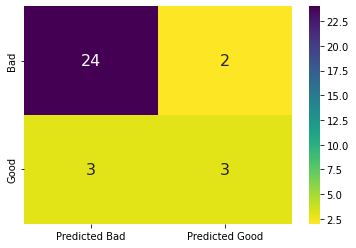

In [30]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_rf),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

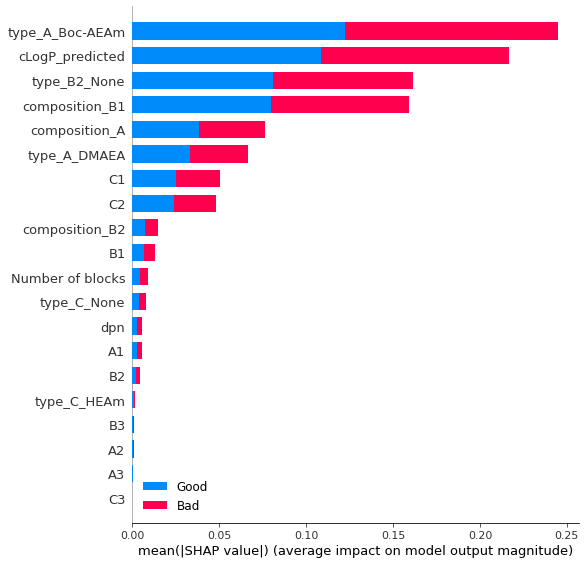

In [31]:
import shap
class_names = ['Bad','Good']
shap_values = shap.TreeExplainer(rf).shap_values(X_test)
shap.summary_plot(shap_values, X_test,class_names= class_names)

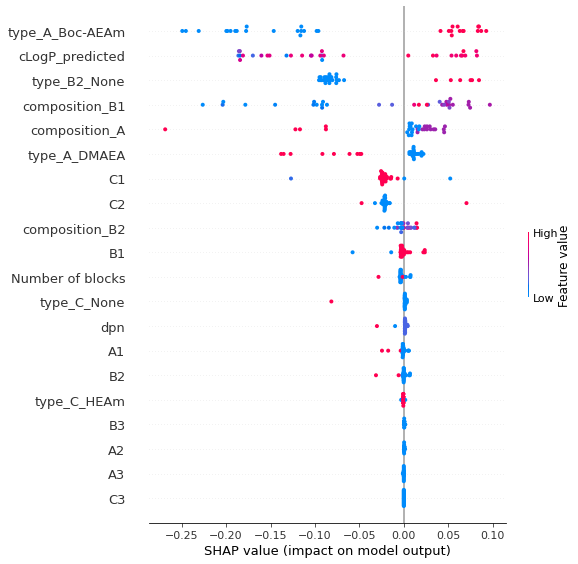

In [32]:
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

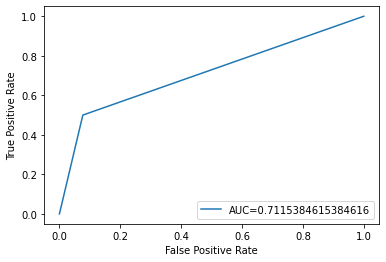

In [33]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_rf)
auc = metrics.roc_auc_score(Y_test, Y_rf)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [35]:
params = {'max_iter': [500, 800, 1000], 'C': [0.001,0.01,0.1,1.0, 10.0, 100.0, 1000.0],'class_weight': ['balanced']}

In [36]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
lr_op = RandomizedSearchCV(lr, params, n_iter=20, cv=cv, scoring='recall', random_state=0, n_jobs=-1, verbose=1)

In [37]:
lr_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0],
                                        'class_weight': ['balanced'],
                                        'max_iter': [500, 800, 1000]},
                   random_state=0, scoring='recall', verbose=1)

In [38]:
lr_op.best_params_

{'max_iter': 1000, 'class_weight': 'balanced', 'C': 1.0}

In [39]:
lr = LogisticRegression(max_iter=800, class_weight = 'balanced', C = 0.01, random_state = 0)

In [40]:
arr = cross_val_score(lr, X_train,Y_train.values.ravel(), cv=cv)
arr

array([0.84375   , 0.80645161, 0.87096774, 0.83870968, 0.84375   ,
       0.77419355, 0.80645161, 0.83870968, 0.84375   , 0.83870968,
       0.90322581, 0.67741935, 0.875     , 0.93548387, 0.77419355,
       0.77419355, 0.84375   , 0.87096774, 0.93548387, 0.77419355])

In [41]:
np.mean(arr)

0.8334677419354838

In [42]:
lr.fit(X_train,Y_train.values.ravel())

LogisticRegression(C=0.01, class_weight='balanced', max_iter=800,
                   random_state=0)

In [43]:
Y_lr = lr.predict(X_test)

In [44]:
confusion_matrix(Y_test,Y_lr)

array([[23,  3],
       [ 2,  4]])

In [45]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_lr, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.92      0.88      0.90        26
        good       0.57      0.67      0.62         6

    accuracy                           0.84        32
   macro avg       0.75      0.78      0.76        32
weighted avg       0.85      0.84      0.85        32



In [46]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [47]:
Y_lr

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

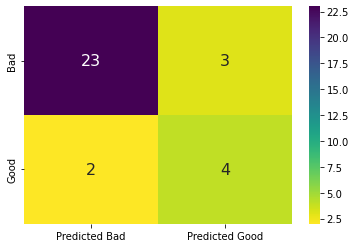

In [48]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_lr),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

In [49]:
lr.coef_


array([[-0.06348943,  0.12182983, -0.01019331,  0.0529878 ,  0.0049094 ,
        -0.00316818, -0.01046716, -0.08093576, -0.01213037,  0.02053372,
         0.15519966,  0.01758919, -0.03786197,  0.08124984,  0.        ,
         0.01182263,  0.01182263,  0.13018536,  0.19215666, -0.11159169,
        -0.10478815,  0.17689058, -0.05493923, -0.07499682,  0.06993353]])

In [50]:
lr_table = pd.DataFrame()
lr_table['features']=X.columns
lr_table['coefficients']=abs(lr.coef_[0,:])
lr_table

,features,coefficients
0,composition_A,0.063489
1,composition_B1,0.121830
2,composition_B2,0.010193
3,Number of blocks,0.052988
4,dpn,0.004909
5,A1,0.003168
6,B1,0.010467
7,C1,0.080936
8,A2,0.012130
9,B2,0.020534


In [51]:
lr_table.sort_values(by=['coefficients'])

,features,coefficients
14,A4,0.000000
5,A1,0.003168
4,dpn,0.004909
2,composition_B2,0.010193
6,B1,0.010467
16,C4,0.011823
15,B4,0.011823
8,A2,0.012130
11,A3,0.017589
9,B2,0.020534


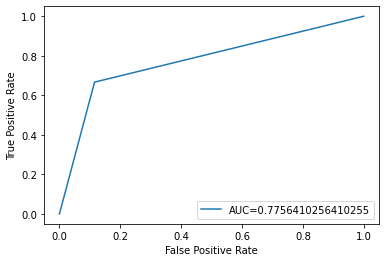

In [52]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_lr)
auc = metrics.roc_auc_score(Y_test, Y_lr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# SVC

In [53]:
from sklearn.svm import SVC
svc=SVC()

In [54]:
params = {'C': [0.0001, 0.001, 0.01,0.1,1,10,100,1000], 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],'gamma': [1000,100,10,1,0.1,0.01,0.001,0.0001],'class_weight':['balanced']}

In [55]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
svc_op = RandomizedSearchCV(svc, params, n_iter=100, cv=cv, scoring='recall', random_state=0, n_jobs=-1, verbose=1)

In [56]:
svc_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'class_weight': ['balanced'],
                                        'gamma': [1000, 100, 10, 1, 0.1, 0.01,
                                                  0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=0, scoring='recall', verbose=1)

In [57]:
svc_op.best_params_

{'kernel': 'sigmoid', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 0.01}

In [58]:
svc = SVC(kernel = 'sigmoid', gamma=0.1, C=0.01, random_state = 0, class_weight = 'balanced')

In [59]:
arr = cross_val_score(svc, X_train,Y_train.values.ravel(), cv=cv)
arr

array([0.1875    , 0.16129032, 0.16129032, 0.16129032, 0.1875    ,
       0.16129032, 0.16129032, 0.16129032, 0.1875    , 0.16129032,
       0.16129032, 0.16129032, 0.1875    , 0.16129032, 0.16129032,
       0.16129032, 0.1875    , 0.16129032, 0.16129032, 0.16129032])

In [60]:
np.mean(arr)

0.16784274193548385

In [61]:
svc.fit(X_train,Y_train.values.ravel())

SVC(C=0.01, class_weight='balanced', gamma=0.1, kernel='sigmoid',
    random_state=0)

In [62]:
Y_svc = svc.predict(X_test)

In [63]:
confusion_matrix(Y_test,Y_svc)

array([[ 0, 26],
       [ 0,  6]])

In [64]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_lr, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.92      0.88      0.90        26
        good       0.57      0.67      0.62         6

    accuracy                           0.84        32
   macro avg       0.75      0.78      0.76        32
weighted avg       0.85      0.84      0.85        32



In [65]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [66]:
Y_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

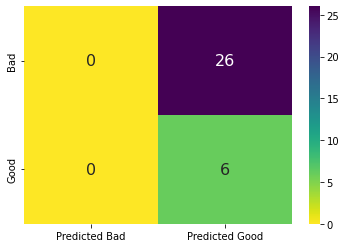

In [67]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_svc),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

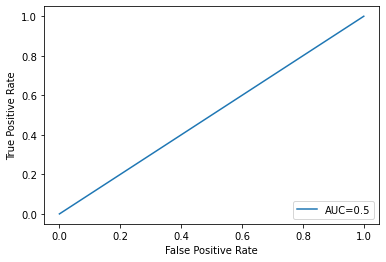

In [68]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_svc)
auc = metrics.roc_auc_score(Y_test, Y_svc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# XGBoost

In [69]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [70]:
params = {'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000],'scale_pos_weight' : [4.0, 4.68, 5.0, 6.0]}

In [71]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
xgb_op = RandomizedSearchCV(xgb, params, n_iter=20, cv=cv, scoring='recall', random_state=0, n_jobs=-1, verbose=1)

In [72]:
xgb_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from panda

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:25:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_dept...
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                            

In [73]:
xgb_op.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 5.0,
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.5}

In [74]:
xgb = XGBClassifier(random_state=0, n_estimators=100, max_depth=15, learning_rate=0.01, colsample_bytree=0.8, colsample_bylevel=0.5, subsample=0.5,scale_pos_weight = 5.0)

In [75]:
arr = cross_val_score(xgb, X_train,Y_train.values.ravel(), cv=cv)
arr

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. T

[12:25:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/cond

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. T

[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/cond

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. T

[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/cond

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. T

[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:59] WARNING: /Users/runner/miniforge3/cond

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. T

array([0.8125    , 0.83870968, 0.87096774, 0.87096774, 0.90625   ,
       0.80645161, 0.74193548, 0.83870968, 0.90625   , 0.87096774,
       0.90322581, 0.70967742, 0.84375   , 0.96774194, 0.77419355,
       0.77419355, 0.8125    , 0.87096774, 0.90322581, 0.74193548])

In [76]:
np.mean(arr)

0.8382560483870968

In [77]:
xgb.fit(X_train,Y_train.values.ravel())

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[12:25:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=5.0,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [78]:
Y_xgb = xgb.predict(X_test)

In [79]:
confusion_matrix(Y_test,Y_xgb)

array([[23,  3],
       [ 2,  4]])

In [80]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_xgb, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.92      0.88      0.90        26
        good       0.57      0.67      0.62         6

    accuracy                           0.84        32
   macro avg       0.75      0.78      0.76        32
weighted avg       0.85      0.84      0.85        32



In [81]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [82]:
Y_xgb

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

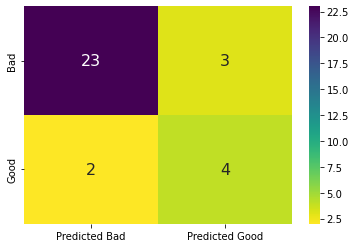

In [83]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_xgb),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

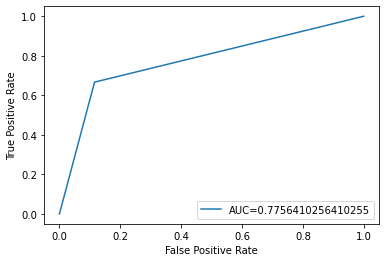

In [84]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_xgb)
auc = metrics.roc_auc_score(Y_test, Y_xgb)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Neural Network Classifier

In [85]:
from sklearn.neural_network import MLPClassifier

In [86]:
ann = MLPClassifier()

In [87]:
params = {'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)], 'activation': ['identity', 'logistic','tanh', 'relu'], 'solver': ['lbfgs','sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive'], 'max_iter': [3000]}

In [88]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
ann_op = RandomizedSearchCV(ann, params, n_iter=20, cv=cv, scoring='recall', verbose=1, random_state=0, n_jobs=-1)

In [89]:
ann_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=MLPClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(1,), (2,), (3,),
                                                               (4,), (5,), (6,),
                                                               (7,), (8,), (9,),
                                                               (10,), (11,),
                                                               (12,), (13,),
                                                               (14,), (15,),
                                                               (16,), (17,),
                                                               (18,), (19,),


In [90]:
ann_op.best_params_

{'solver': 'lbfgs',
 'max_iter': 3000,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (14,),
 'alpha': 0.05,
 'activation': 'tanh'}

In [91]:
ann = MLPClassifier(max_iter = 3000, random_state=0, solver='lbfgs', learning_rate='adaptive', hidden_layer_sizes=(10,), alpha=0.05, activation='logistic')

In [92]:
arr = cross_val_score(ann, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.9375    , 0.80645161, 0.87096774, 0.90322581, 0.875     ,
       0.90322581, 0.90322581, 0.90322581, 0.875     , 0.93548387,
       0.90322581, 0.77419355, 0.90625   , 0.93548387, 0.93548387,
       0.80645161, 0.8125    , 0.90322581, 0.93548387, 0.80645161])

In [93]:
np.mean(arr)

0.881602822580645

In [94]:
ann.fit(X_train,Y_train.values.ravel())

MLPClassifier(activation='logistic', alpha=0.05, hidden_layer_sizes=(10,),
              learning_rate='adaptive', max_iter=3000, random_state=0,
              solver='lbfgs')

In [95]:
Y_ann = ann.predict(X_test)

In [96]:
confusion_matrix(Y_test,Y_ann)

array([[25,  1],
       [ 2,  4]])

In [97]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_ann, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.93      0.96      0.94        26
        good       0.80      0.67      0.73         6

    accuracy                           0.91        32
   macro avg       0.86      0.81      0.84        32
weighted avg       0.90      0.91      0.90        32



In [98]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [99]:
Y_ann

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

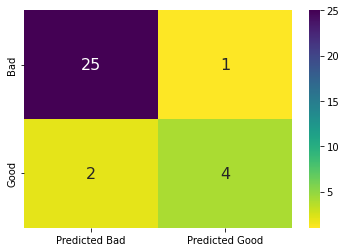

In [100]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_ann),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

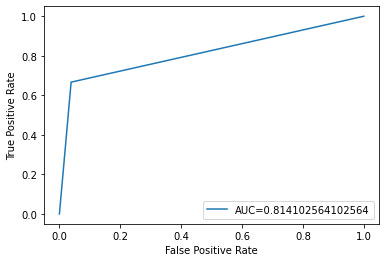

In [101]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_ann)
auc = metrics.roc_auc_score(Y_test, Y_ann)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [103]:
params = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"], 'splitter' : ["best", "random"], 'max_features' :  ["auto", "sqrt", "log2"], 'class_weight' : ['balanced']}

In [104]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
dtc_op = RandomizedSearchCV(dtc, params, n_iter=20, cv=cv, scoring='recall', verbose=1, random_state=0, n_jobs=-1)

In [105]:
dtc_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=DecisionTreeClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'splitter': ['best', 'random']},
                   random_state=0, scoring='recall', verbose=1)

In [106]:
dtc_op.best_params_

{'splitter': 'best',
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [107]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=dtc_op.best_params_['max_depth'], criterion=dtc_op.best_params_['criterion'], min_samples_leaf=dtc_op.best_params_['min_samples_leaf'], splitter = dtc_op.best_params_['splitter'], max_features = dtc_op.best_params_['max_features'], class_weight = dtc_op.best_params_['class_weight'])

dtc = DecisionTreeClassifier(random_state=0, max_depth=5, criterion='gini', min_samples_leaf=20, splitter = 'best', max_features = 'sqrt', class_weight = 'balanced')

In [108]:
arr = cross_val_score(dtc, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.90625   , 0.77419355, 0.93548387, 0.77419355, 0.84375   ,
       0.90322581, 0.70967742, 0.87096774, 0.90625   , 0.61290323,
       0.83870968, 0.74193548, 0.84375   , 1.        , 0.77419355,
       0.74193548, 0.75      , 0.90322581, 0.83870968, 0.87096774])

In [109]:
np.mean(arr)

0.827016129032258

In [110]:
dtc.fit(X_train,Y_train.values.ravel())

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features='log2', min_samples_leaf=5,
                       random_state=0)

In [111]:
Y_dtc = dtc.predict(X_test)

In [112]:
confusion_matrix(Y_test,Y_dtc)

array([[23,  3],
       [ 0,  6]])

In [113]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_dtc, target_names = target_names))

              precision    recall  f1-score   support

         bad       1.00      0.88      0.94        26
        good       0.67      1.00      0.80         6

    accuracy                           0.91        32
   macro avg       0.83      0.94      0.87        32
weighted avg       0.94      0.91      0.91        32



In [114]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [115]:
Y_dtc

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0])

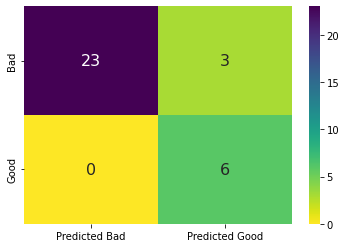

In [116]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_dtc),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

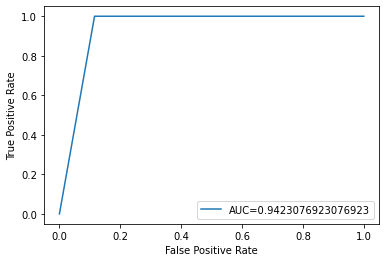

In [117]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_dtc)
auc = metrics.roc_auc_score(Y_test, Y_dtc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Ada-boost Classifier (on imbalanced data)

In [118]:
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier()

In [119]:
params = {'n_estimators':[1,10, 20, 30, 50, 100, 200, 1000, 2000, 3000, 5000], 'algorithm':['SAMME', 'SAMME.R'],'learning_rate':[1.0,1.1,1.2,1.3,1.4, 1.5, 2.0, 2.5]}

In [120]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
ada_op = RandomizedSearchCV(ada, params, n_iter=20, cv=cv, scoring='recall', verbose=1, random_state=0, n_jobs=-1)

In [121]:
ada_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=AdaBoostClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [1.0, 1.1, 1.2, 1.3,
                                                          1.4, 1.5, 2.0, 2.5],
                                        'n_estimators': [1, 10, 20, 30, 50, 100,
                                                         200, 1000, 2000, 3000,
                                                         5000]},
                   random_state=0, scoring='recall', verbose=1)

In [122]:
ada_op.best_params_

{'n_estimators': 10, 'learning_rate': 2.5, 'algorithm': 'SAMME.R'}

In [123]:
ada = AdaBoostClassifier(random_state=0,n_estimators = 2000, learning_rate = 1.1, algorithm = 'SAMME.R' )

In [124]:
arr = cross_val_score(ada, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.90625   , 0.87096774, 0.96774194, 0.87096774, 0.90625   ,
       0.93548387, 0.87096774, 0.93548387, 0.9375    , 0.87096774,
       0.96774194, 0.87096774, 0.9375    , 0.93548387, 0.83870968,
       0.83870968, 0.75      , 0.93548387, 0.90322581, 0.87096774])

In [125]:
np.mean(arr)

0.8960685483870968

In [126]:
ada.fit(X_train,Y_train.values.ravel())

AdaBoostClassifier(learning_rate=1.1, n_estimators=2000, random_state=0)

In [127]:
Y_ada = ada.predict(X_test)

In [128]:
confusion_matrix(Y_test,Y_ada)

array([[26,  0],
       [ 2,  4]])

In [129]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_ada, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.93      1.00      0.96        26
        good       1.00      0.67      0.80         6

    accuracy                           0.94        32
   macro avg       0.96      0.83      0.88        32
weighted avg       0.94      0.94      0.93        32



In [130]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [131]:
Y_ada

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

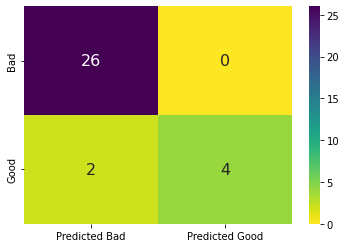

In [132]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_ada),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

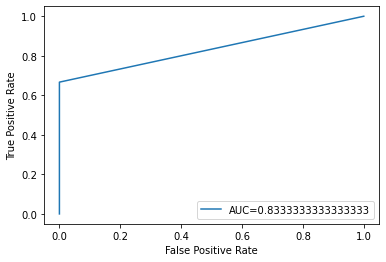

In [133]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_ada)
auc = metrics.roc_auc_score(Y_test, Y_ada)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Naive Bayes Classification (class imbalanced)

In [134]:
gnb = GaussianNB()

In [135]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}

In [136]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
gnb_op = RandomizedSearchCV(gnb, params, n_iter=20, cv=cv, scoring='recall', verbose=1, random_state=0, n_jobs=-1)

In [137]:
gnb_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=GaussianNB(), n_iter=20, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=0, scoring='recall', verbose=1)

In [138]:
gnb_op.best_params_

{'var_smoothing': 1.519911082952933e-08}

In [139]:
gnb = GaussianNB(var_smoothing = 1.519911082952933e-08 )

In [140]:
arr = cross_val_score(gnb, X_train, Y_train.values.ravel(), cv=cv)
arr

array([0.84375   , 0.83870968, 0.90322581, 0.80645161, 0.53125   ,
       0.80645161, 0.87096774, 0.83870968, 0.625     , 0.96774194,
       0.96774194, 0.70967742, 0.90625   , 0.74193548, 0.83870968,
       0.80645161, 0.75      , 0.83870968, 0.93548387, 0.83870968])

In [141]:
np.mean(arr)

0.8182963709677418

In [142]:
gnb.fit(X_train,Y_train.values.ravel())

GaussianNB(var_smoothing=1.519911082952933e-08)

In [143]:
Y_gnb = gnb.predict(X_test)

In [144]:
confusion_matrix(Y_test,Y_gnb)

array([[24,  2],
       [ 3,  3]])

In [145]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_gnb, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.89      0.92      0.91        26
        good       0.60      0.50      0.55         6

    accuracy                           0.84        32
   macro avg       0.74      0.71      0.73        32
weighted avg       0.83      0.84      0.84        32



In [146]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [147]:
Y_gnb

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

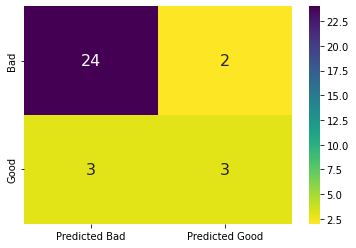

In [148]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_gnb),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

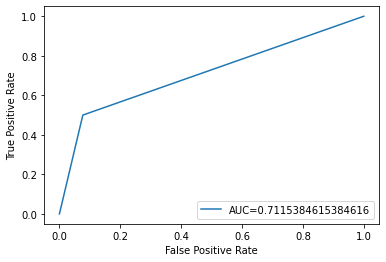

In [149]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_gnb)
auc = metrics.roc_auc_score(Y_test, Y_gnb)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# kNN Classifier

In [150]:
knn = KNeighborsClassifier()

In [151]:
params = {'leaf_size' : list(range(1,50)), 'n_neighbors' : list(range(1,30)), 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p' : [1,2], 'weights' : ['uniform', 'distance'] }

In [152]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)
knn_op = RandomizedSearchCV(knn, params, n_iter=20, cv=cv, scoring='recall', verbose=1, random_state=0, n_jobs=-1)

In [153]:
knn_op.fit(X_train,Y_train.values.ravel())

Fitting 20 folds for each of 20 candidates, totalling 400 fits


/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=4, random_state=0),
                   estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 2

In [154]:
knn_op.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 1,
 'leaf_size': 36,
 'algorithm': 'kd_tree'}

In [155]:
knn = KNeighborsClassifier(weights = 'uniform', p = 2, n_neighbors = 1, leaf_size = 36, algorithm = 'kd_tree')

In [156]:
arr = cross_val_score(knn, X_train, Y_train.values.ravel(), cv=cv)
arr

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
void this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mo

eepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/varunkundi/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default be

array([0.9375    , 0.87096774, 0.96774194, 0.83870968, 0.90625   ,
       0.87096774, 0.93548387, 0.87096774, 0.9375    , 0.93548387,
       0.90322581, 0.77419355, 0.9375    , 0.96774194, 0.90322581,
       0.93548387, 0.78125   , 0.90322581, 0.93548387, 0.83870968])

In [157]:
np.mean(arr)

0.8975806451612904

In [158]:
knn.fit(X_train,Y_train.values.ravel())

KNeighborsClassifier(algorithm='kd_tree', leaf_size=36, n_neighbors=1)

In [159]:
Y_knn = knn.predict(X_test)

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [160]:
confusion_matrix(Y_test,Y_knn)

array([[25,  1],
       [ 2,  4]])

In [161]:
target_names = ['bad','good']
print(classification_report(Y_test, Y_knn, target_names = target_names))

              precision    recall  f1-score   support

         bad       0.93      0.96      0.94        26
        good       0.80      0.67      0.73         6

    accuracy                           0.91        32
   macro avg       0.86      0.81      0.84        32
weighted avg       0.90      0.91      0.90        32



In [162]:
Y_test['Category'].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [163]:
Y_knn

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

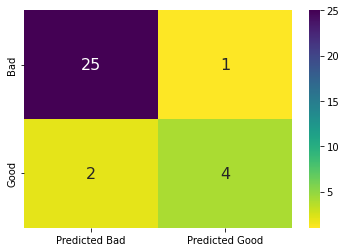

In [164]:
s1=sns.heatmap(confusion_matrix(Y_test, Y_knn),cmap='viridis_r', annot=True, annot_kws={"size": 16},xticklabels=['Predicted Bad','Predicted Good'],yticklabels=['Bad','Good'])
fig1=s1.get_figure()
#fig1.savefig(out_file_path+'/RF.jpeg')
#fig1.savefig('RF.jpeg')

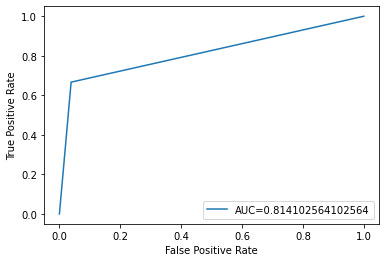

In [165]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_knn)
auc = metrics.roc_auc_score(Y_test, Y_knn)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [166]:
from sklearn import metrics
#train_idx, test_idx = scv.split(X, Y).next()
#clf = RandomForestClassifier(n_estimators=10, random_state=RNG)

#clf.fit(X[train_idx], y[train_idx])
#print X[train_idx].shape, X[test_idx].shape
Y_dtc_probas = dtc.predict_proba(X_test)[:,1]
Y_dtc = dtc.predict(X_test)

## confusion matrix
print('--confusion matrix--')
cm = metrics.confusion_matrix(Y_test, Y_dtc, labels=[0,1])
print(cm)
print('--classification report --')
print(metrics.classification_report(Y_test, Y_dtc, labels=[0,1]))

--confusion matrix--
[[23  3]
 [ 0  6]]
--classification report --
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.67      1.00      0.80         6

    accuracy                           0.91        32
   macro avg       0.83      0.94      0.87        32
weighted avg       0.94      0.91      0.91        32



AUPRC = 0.888889
Accuracy = 0.906250


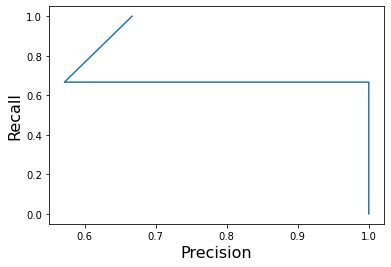

In [167]:
fig, ax = plt.subplots()

pr, rc, thresholds = metrics.precision_recall_curve(Y_test, Y_dtc_probas)
ax.plot(pr, rc)

#ax.legend(loc='best')
ax.set_xlabel('Precision', fontsize=16)
ax.set_ylabel('Recall', fontsize=16)
print('AUPRC = %.6f' % metrics.average_precision_score(Y_test, Y_dtc_probas))
print('Accuracy = %.6f' % metrics.accuracy_score(Y_test, Y_dtc))

# Model Comparison

In [168]:
models = [rf, lr, svc, xgb, ann, dtc, ada, gnb, knn]
model_pipeline = []
for i in models:
    i_model = i.fit(X_train,Y_train.values.ravel())
    model_pipeline.append(i_model)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[12:29:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [169]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#model_list = ['Logistic Regression','SVM', 'KNN','Decision Tree', 'Random Forest','Naive Bayes','AdaBoost']
model_list = ['Random Forest','Logistic Regression', 'SVC','XG Boost','Neural Network','Decision Tree','Ada Boost', 'Naive Bayes','kNN']
acc_list = []
auc_list = []
cm_list = []
f1_good_list = []
recall_good_list = []
precision_good_list = []

for model in model_pipeline:
    model.fit(X_train,Y_train.values.ravel())
    Y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test,Y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(Y_test,Y_pred))
    f1_good_list.append(f1_score(Y_test, Y_pred, labels=[1], average ='binary'))
    recall_good_list.append(recall_score(Y_test, Y_pred, labels=[1], average ='binary'))
    precision_good_list.append(precision_score(Y_test, Y_pred, labels=[1], average ='binary'))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[12:29:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [170]:
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list,'F1_pred_1':f1_good_list, 'Recall_pred_1':recall_good_list, 'Precision_pred_1':precision_good_list})
df = result_df.round(3)
df.sort_values(by=['Recall_pred_1'],ascending=False)

,Model,Accuracy,AUC,F1_pred_1,Recall_pred_1,Precision_pred_1
2,SVC,0.188,0.50,0.316,1.000,0.188
5,Decision Tree,0.906,0.94,0.800,1.000,0.667
1,Logistic Regression,0.844,0.78,0.615,0.667,0.571
3,XG Boost,0.844,0.78,0.615,0.667,0.571
4,Neural Network,0.906,0.81,0.727,0.667,0.800
6,Ada Boost,0.938,0.83,0.800,0.667,1.000
8,kNN,0.906,0.81,0.727,0.667,0.800
0,Random Forest,0.844,0.71,0.545,0.500,0.600
7,Naive Bayes,0.844,0.71,0.545,0.500,0.600


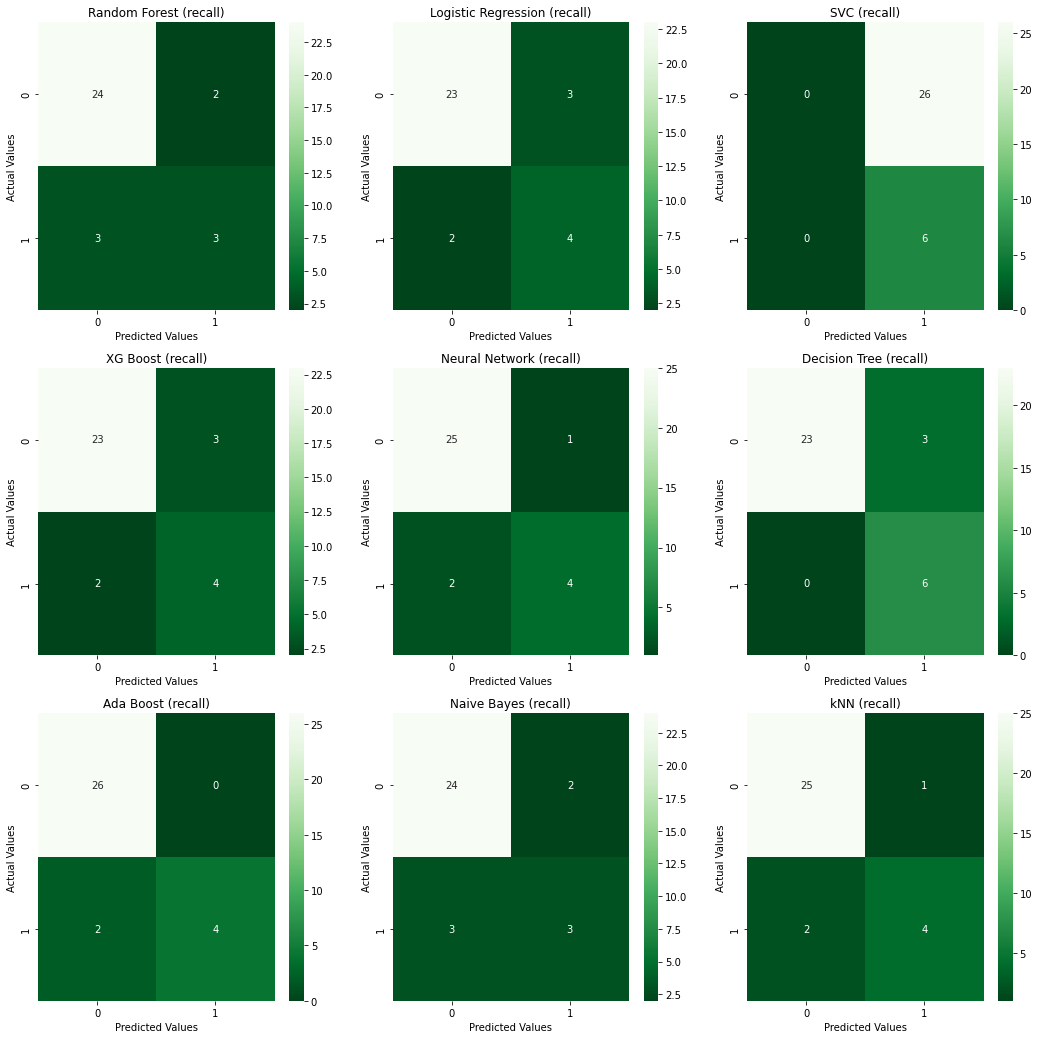

In [171]:
import seaborn as sns

fig = plt.figure(figsize = (18,18))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(3, 3, i+1).set_title(model+' (recall)')
    cm_plot = sns.heatmap(cm,annot=True, cmap = 'Greens_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

# SHAP Analysis on DTC

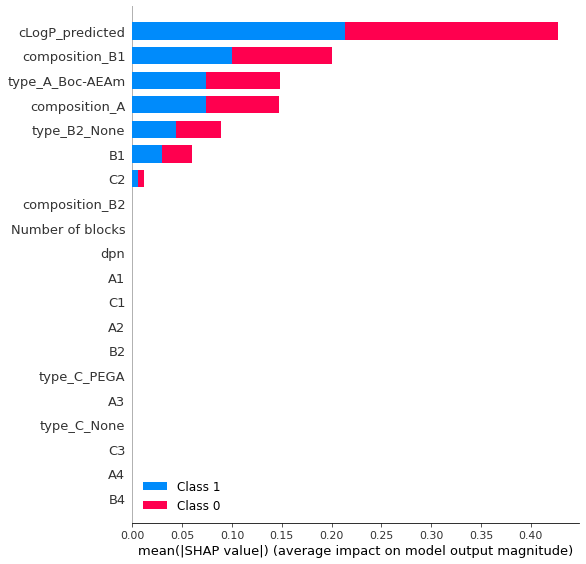

In [414]:
import shap
shap.initjs()
#class_names = ['bad','good']
explainer = shap.TreeExplainer(dtc,X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names= None)

In [415]:
shap_values_df=pd.DataFrame(shap_values[0])
shap_values_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.052030,0.118144,0.0,0.0,0.0,0.0,-0.017914,0.0,0.0,0.0,...,0.0,0.0,0.227493,-0.024894,0.0,0.0,-0.005716,0.0,0.0,0.0
1,0.065409,0.128550,0.0,0.0,0.0,0.0,-0.017914,0.0,0.0,0.0,...,0.0,0.0,0.063971,-0.024894,0.0,0.0,0.029962,0.0,0.0,0.0
2,-0.068382,-0.104112,0.0,0.0,0.0,0.0,0.167943,0.0,0.0,0.0,...,0.0,0.0,-0.216776,-0.043333,0.0,0.0,-0.005352,0.0,0.0,0.0
3,-0.068382,-0.104112,0.0,0.0,0.0,0.0,-0.056727,0.0,0.0,0.0,...,0.0,0.0,-0.295896,-0.043333,0.0,0.0,-0.132988,0.0,0.0,0.0
4,-0.052030,-0.073629,0.0,0.0,0.0,0.0,-0.017914,0.0,0.0,0.0,...,0.0,0.0,0.232103,0.162270,0.0,0.0,-0.005716,0.0,0.0,0.0
5,-0.052030,0.118144,0.0,0.0,0.0,0.0,-0.017914,0.0,0.0,0.0,...,0.0,0.0,0.227493,-0.024894,0.0,0.0,-0.005716,0.0,0.0,0.0
6,-0.052030,0.013037,0.0,0.0,0.0,0.0,-0.017914,0.0,0.0,0.0,...,0.0,0.0,0.263450,0.044255,0.0,0.0,-0.005716,0.0,0.0,0.0
7,0.341910,-0.029431,0.0,0.0,0.0,0.0,-0.027617,0.0,0.0,0.0,...,0.0,0.0,-0.157007,0.009220,0.0,0.0,0.107376,0.0,0.0,0.0
8,0.065409,0.023443,0.0,0.0,0.0,0.0,-0.017914,0.0,0.0,0.0,...,0.0,0.0,0.099928,0.044255,0.0,0.0,0.029962,0.0,0.0,0.0
9,-0.052030,-0.073629,0.0,0.0,0.0,0.0,-0.017914,0.0,0.0,0.0,...,0.0,0.0,0.232103,0.162270,0.0,0.0,-0.005716,0.0,0.0,0.0


In [416]:
X_test

,composition_A,composition_B1,composition_B2,Number of blocks,dpn,A1,B1,C1,A2,B2,...,B4,C4,cLogP_predicted,type_A_Boc-AEAm,type_A_DMAEA,type_B1_PEAm,type_B2_None,type_C_HEAm,type_C_None,type_C_PEGA
59,-0.099386,-1.160195,1.356913,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,...,-0.113592,-0.113592,0.304589,1.019294,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
41,1.148908,-0.970653,-0.279883,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,...,-0.113592,-0.113592,0.398695,1.019294,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
24,-0.099386,0.735233,-0.720559,1.334949,-0.163249,1.819636,-2.589431,-1.441870,-0.176477,3.364154,...,-0.113592,-0.113592,0.572166,1.019294,-0.584705,0.139573,1.800901,0.246598,-0.181369,-0.113592
31,-0.099386,0.735233,-0.720559,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,...,-0.113592,-0.113592,0.572166,1.019294,-0.584705,0.139573,1.800901,0.246598,-0.181369,-0.113592
155,-1.347681,0.292966,2.238264,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,...,-0.113592,-0.113592,-0.555616,-0.981071,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
58,-0.099386,-0.465205,0.664422,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,...,-0.113592,-0.113592,0.413824,1.019294,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
144,-1.347681,-1.160195,-0.720559,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,...,-0.113592,-0.113592,-1.491842,-0.981071,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
85,1.148908,-0.717929,0.097839,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,...,-0.113592,-0.113592,0.600821,-0.981071,1.710263,0.139573,-0.555278,0.246598,-0.181369,-0.113592
129,1.148908,-0.528386,0.538515,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,...,-0.113592,-0.113592,-2.049884,-0.981071,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592
142,-0.099386,-0.086119,1.356913,-0.382977,-0.163249,-0.184463,0.353758,0.437195,-0.176477,-0.316488,...,-0.113592,-0.113592,-1.297785,-0.981071,-0.584705,0.139573,-0.555278,0.246598,-0.181369,-0.113592


In [417]:
Y_test

,Category
59,0
41,0
24,0
31,1
155,0
58,0
144,0
85,0
129,0
142,0


In [418]:
Y_dtc

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0])

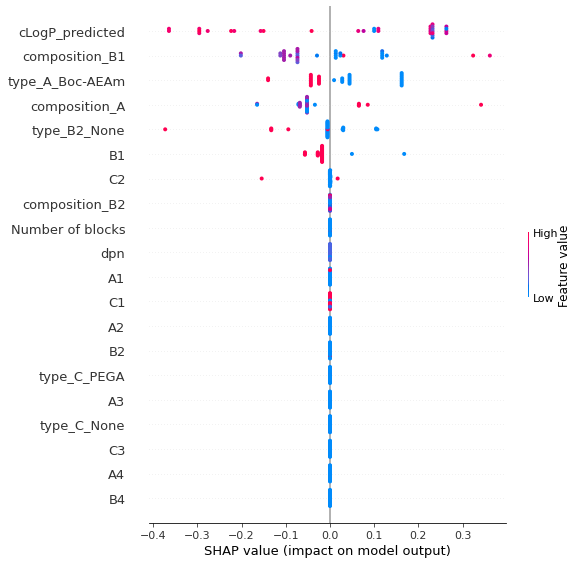

In [419]:
shap.summary_plot(shap_values[0], X_test.values, feature_names = X_test.columns)

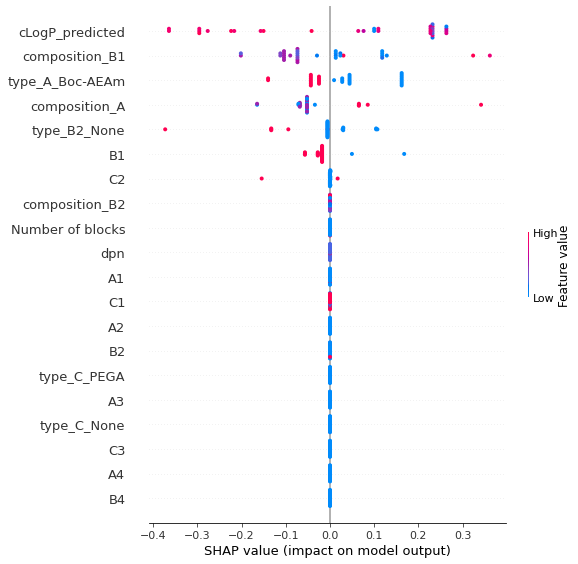

In [420]:
shap.summary_plot(shap_values[0], X_test.values, feature_names = X_test.columns)

In [436]:
#explainer = shap.KernelExplainer(dtc.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

In [437]:
shap_values = explainer.shap_values(X_test.iloc[1,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[1,:])

In [438]:
shap_values = explainer.shap_values(X_test.iloc[2,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[2,:])

In [439]:
shap_values = explainer.shap_values(X_test.iloc[3,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[3,:])

In [441]:
shap_values = explainer.shap_values(X_test.iloc[4,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[4,:])

In [426]:
shap_values = explainer.shap_values(X_test.iloc[5,:])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[9,:])

In [427]:
shap_values = explainer.shap_values(X_test.iloc[6,:])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[9,:])

In [428]:
shap_values = explainer.shap_values(X_test.iloc[7,:])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[9,:])

In [429]:
shap_values = explainer.shap_values(X_test.iloc[8,:])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[9,:])

In [430]:
shap_values = explainer.shap_values(X_test.iloc[9,:])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[9,:])

In [431]:
shap_values = explainer.shap_values(X_test.iloc[10,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[10,:])

In [432]:
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

In [433]:
shap.dependence_plot('cLogP_predicted', shap_values[1], X_scaled)
shap.dependence_plot('cLogP_predicted', shap_values[0], X_scaled)

TypeError: order must be str, not int

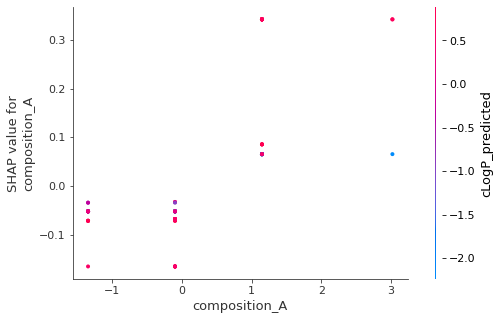

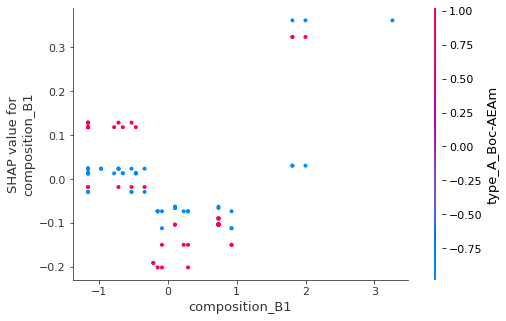

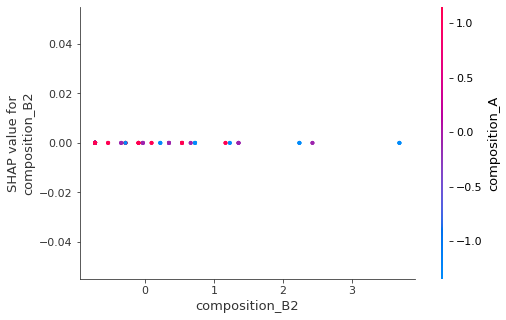

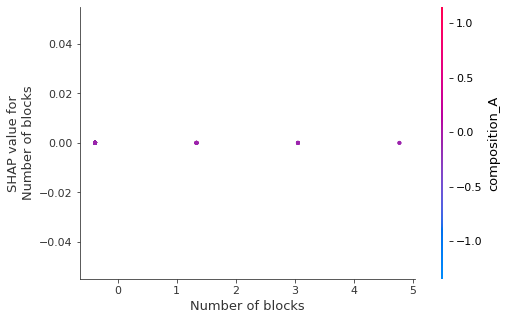

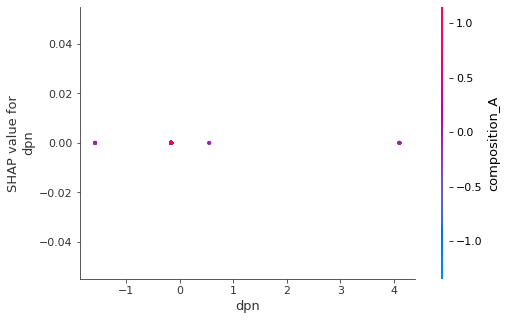

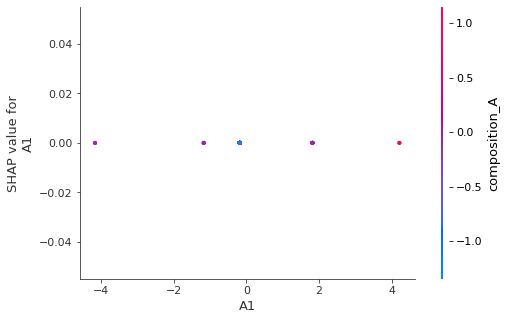

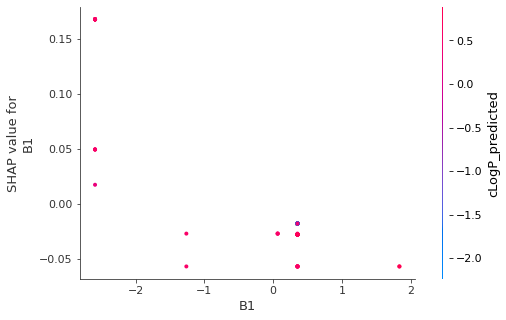

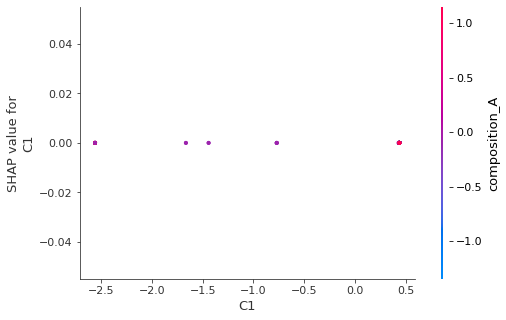

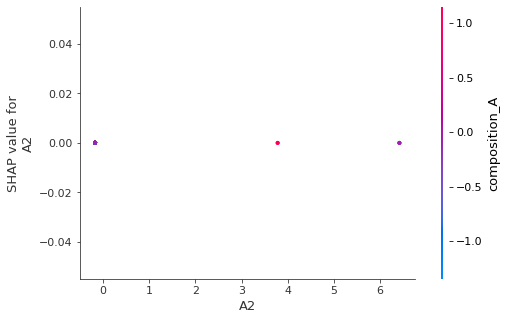

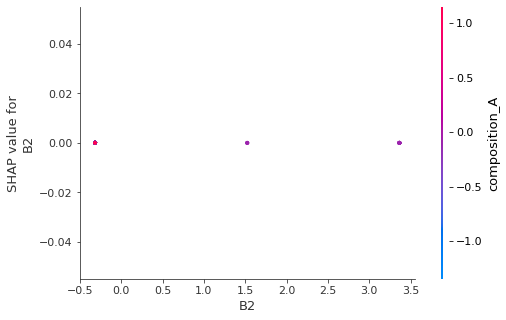

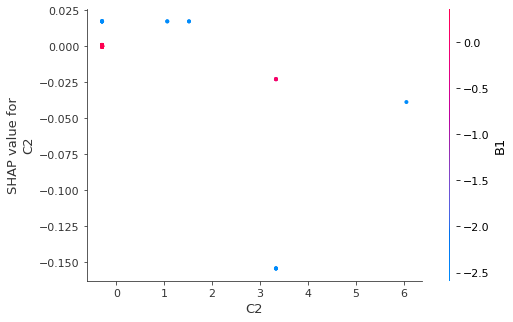

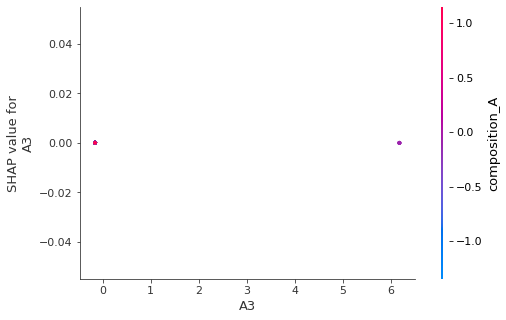

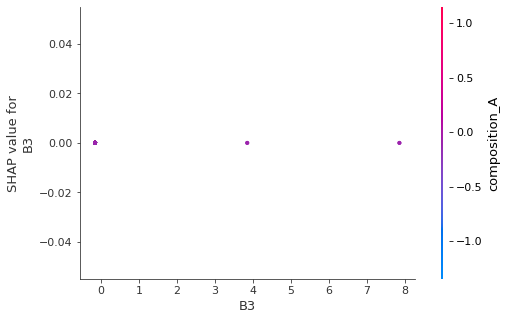

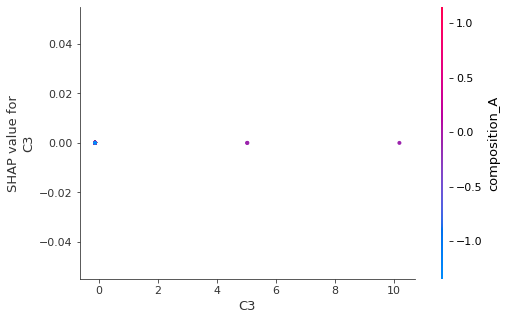

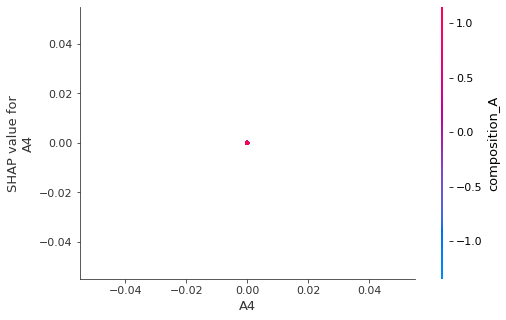

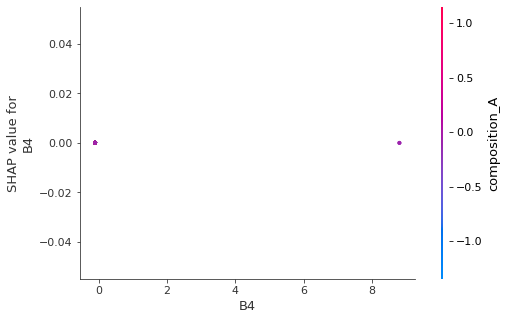

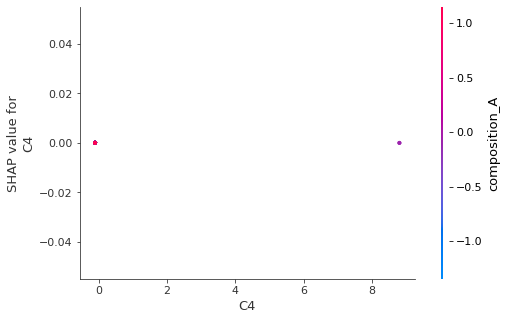

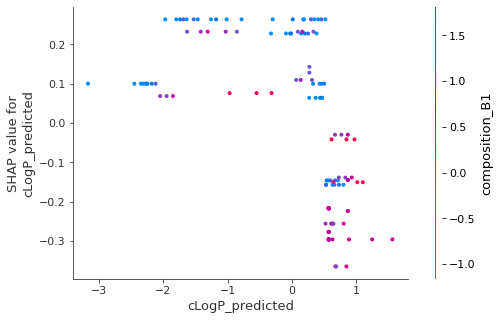

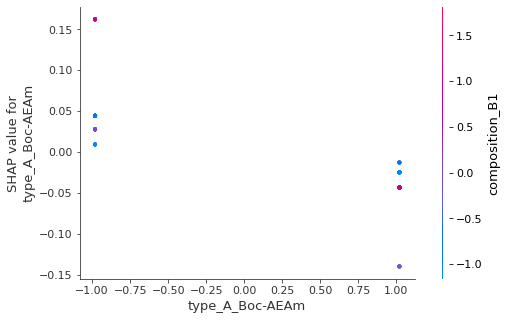

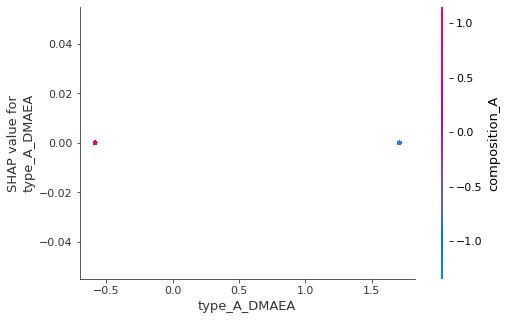

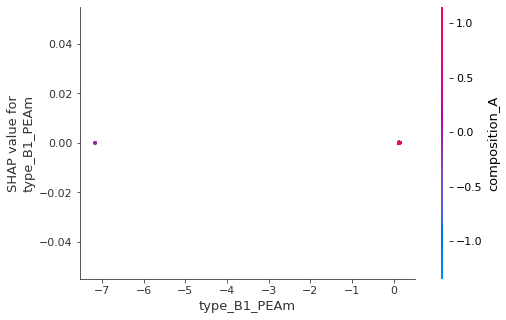

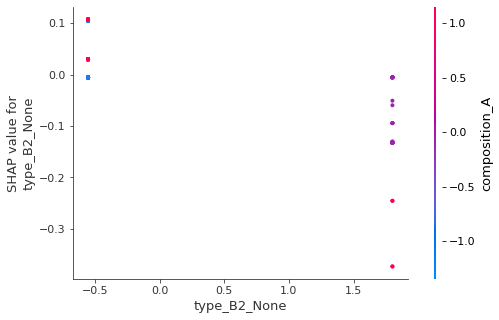

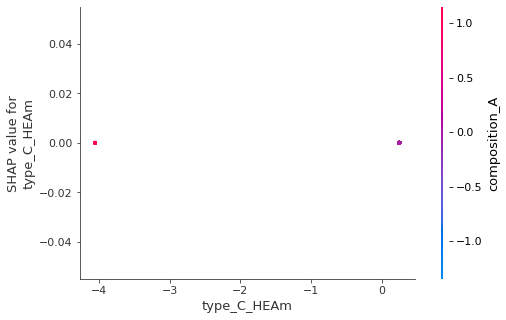

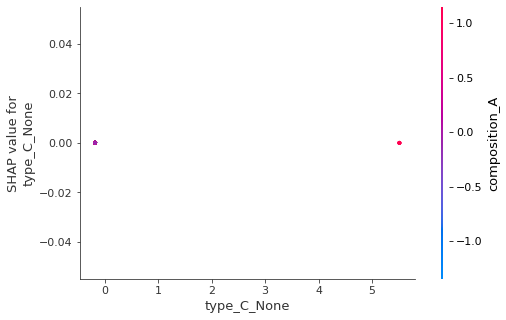

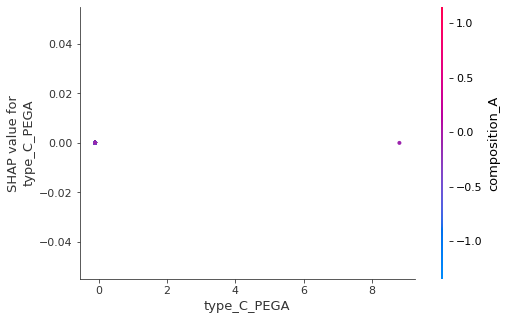

In [444]:
explainer = shap.TreeExplainer(dtc,X_train)
shap_values = explainer.shap_values(X_train)

for name in X_train.columns:
    shap.dependence_plot(name, shap_values[0], X_train)

In [442]:
shap.dependence_plot('cLogP_predicted', shap_values[0], X_scaled)

TypeError: order must be str, not int